#### Importing The Dataset

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.callbacks import ModelCheckpoint
import warnings
# filter warnings
warnings.filterwarnings('ignore')
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_valid = X_train[-6000:]
y_valid = y_train[-6000:]
X_train = X_train[0:54000]
y_train = y_train[0:54000]
print('X_train shape: ', X_train.shape, 'X_test shape: ', X_test.shape, 'X valid shape: ', X_valid.shape) 
print('y_train shape: ', y_train.shape, 'y_test shape: ', y_test.shape, 'y valid shape: ', y_valid.shape)

X_train shape:  (54000, 28, 28) X_test shape:  (10000, 28, 28) X valid shape:  (6000, 28, 28)
y_train shape:  (54000,) y_test shape:  (10000,) y valid shape:  (6000,)


### Visualizing randomly some images in the training set

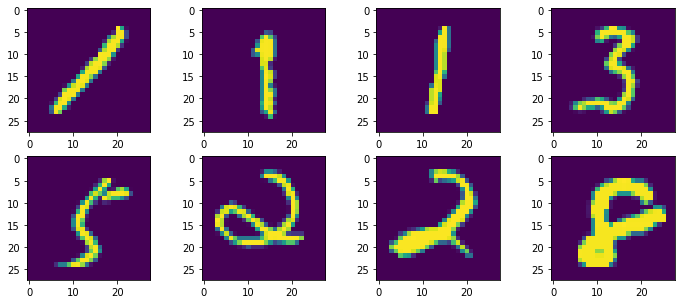

In [2]:
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (12,5))
for i in range(8):
    ind = random.randint(0, len(X_train))
    plt.subplot(240+1+i)
    plt.imshow(X_train[ind])

In [3]:
from tensorflow.keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test, X_valid, y_valid):
    # reshape images to the required size of Keras
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
    # convert image values from integers to floats
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')
    X_test = X_test.astype('float32')
  
    # normalization
    X_train = X_train/255.0
    X_valid = X_valid/255.0
    X_test_norm = X_test/255.0
  
    # One-hot encoding label 
    y_train = to_categorical(y_train)
    y_valid = to_categorical(y_valid)
    y_test = to_categorical(y_test)
  
    return X_train, y_train, X_test, y_test, X_valid, y_valid

In [4]:
X_train, y_train, X_test, y_test, X_valid, y_valid = preprocess_data(X_train, y_train, X_test, y_test, X_valid, y_valid)

In [5]:
cp = ModelCheckpoint("model3/" ,save_best_only = True)

### Building The Model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy

def LeNet():
    model = Sequential()

    # Convolutional layer increased filter and kernel size 
    model.add(Conv2D(filters = 14, kernel_size = (6, 6), padding = 'same', 
                       activation = 'relu', input_shape = (28,28,1)))

    # Max-pooing layer with pooling window size is 2x2
    model.add(MaxPooling2D(pool_size = (2,2)))

    # Convolutional layer 
    model.add(Conv2D(filters = 28, kernel_size = (6, 6), activation = 'relu'))

    # Max-pooling layer 
    model.add(MaxPooling2D(pool_size = (2,2)))

    # Flatten layer 
    model.add(Flatten())

    # The first fully connected layer 
    model.add(Dense(120, activation = 'relu'))
    # adding droup out 
    model.add(Dropout(0.3))
    
    # The second fully connected layer 
    model.add(Dense(84, activation = 'relu'))
    # adding droup out
    model.add(Dropout(0.3))

    # The output layer  
    model.add(Dense(10, activation = 'softmax'))

    # compile the model with a loss function, a metric and an optimizer function
    # In this case, the loss function is categorical crossentropy, 
    # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 to optimize the loss function
    # metric: accuracy 

    opt = SGD(lr = 0.01)
    model.compile(loss = categorical_crossentropy, 
                    optimizer = opt, 
                    metrics = ['accuracy']) 

    return model

In [7]:
model = LeNet()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 14)        518       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 14)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 28)          14140     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 120)               5

In [9]:
def train_model(model, X_train, y_train, X_valid, y_valid, epochs = 50, batch_size = 128):
    # Rescaling all training and testing data
    #X_train, y_train, X_valid, y_valid = preprocess_data(X_train, y_train, X_valid, y_valid)
    # Fitting the model on the training set
    history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_valid, y_valid), 
                      validation_steps = X_valid.shape[0]//batch_size, verbose = 1, callbacks = [cp])
    # evaluating the model
    _, acc = model.evaluate(X_valid, y_valid, verbose = 1)
    print('%.3f' % (acc * 100.0))
    return model, history

In [10]:
model, history = train_model(model, X_train, y_train, X_valid, y_valid, epochs = 55, batch_size = 128)

Epoch 1/55
421/421 [==============================] - 15s 35ms/step - loss: 1.7415 - accuracy: 0.4141 - val_loss: 0.5125 - val_accuracy: 0.8828
Epoch 2/55
421/421 [==============================] - 15s 36ms/step - loss: 0.6273 - accuracy: 0.8070 - val_loss: 0.2263 - val_accuracy: 0.9399
Epoch 3/55
421/421 [==============================] - 16s 38ms/step - loss: 0.4079 - accuracy: 0.8771 - val_loss: 0.1553 - val_accuracy: 0.9562
Epoch 4/55
421/421 [==============================] - 16s 37ms/step - loss: 0.3168 - accuracy: 0.9056 - val_loss: 0.1253 - val_accuracy: 0.9631
Epoch 5/55
421/421 [==============================] - 17s 40ms/step - loss: 0.2618 - accuracy: 0.9233 - val_loss: 0.1074 - val_accuracy: 0.9665
Epoch 6/55
421/421 [==============================] - 17s 41ms/step - loss: 0.2280 - accuracy: 0.9324 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 7/55
421/421 [==============================] - 17s 41ms/step - loss: 0.2063 - accuracy: 0.9396 - val_loss: 0.0856 - val_accuracy:

Epoch 33/55
421/421 [==============================] - 18s 42ms/step - loss: 0.0727 - accuracy: 0.9790 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 34/55
421/421 [==============================] - 19s 46ms/step - loss: 0.0732 - accuracy: 0.9787 - val_loss: 0.0387 - val_accuracy: 0.9874
Epoch 35/55
421/421 [==============================] - 18s 42ms/step - loss: 0.0703 - accuracy: 0.9798 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 36/55
421/421 [==============================] - 17s 40ms/step - loss: 0.0712 - accuracy: 0.9793 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 37/55
421/421 [==============================] - 16s 38ms/step - loss: 0.0674 - accuracy: 0.9805 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 38/55
421/421 [==============================] - 16s 39ms/step - loss: 0.0647 - accuracy: 0.9814 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 39/55
421/421 [==============================] - 17s 41ms/step - loss: 0.0680 - accuracy: 0.9799 - val_loss: 0.0357 - val_ac

In [11]:
from tensorflow.keras.models import load_model
model = load_model("model3/")

### Plotting the loss and accuracy

In [12]:
def summary_history_accuracy(history):
    plt.figure(figsize = (10,6))
    plt.plot(history.history['accuracy'], color = 'blue', label = 'train_accurarcy')
    plt.plot(history.history['val_accuracy'], color = 'red', label = 'val_accurarcy')
    plt.legend()
    plt.title('Accuracy')
    plt.show()
    
def summary_history_losses(history):
    plt.figure(figsize = (10,6))
    plt.plot(history.history['loss'], color = 'blue', label = 'train_loss')
    plt.plot(history.history['val_loss'], color = 'red', label = 'val_loss')
    plt.legend()
    plt.title('Loss')
    plt.show()
    

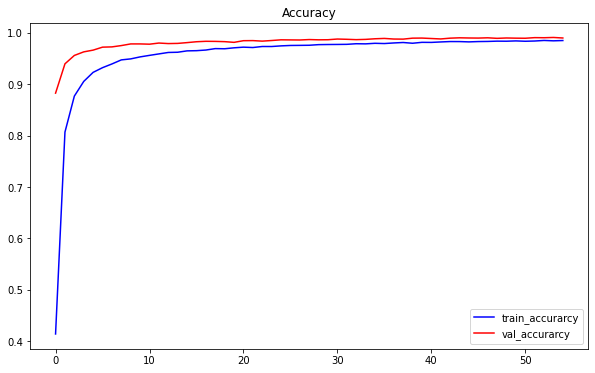

In [13]:
summary_history_accuracy(history)

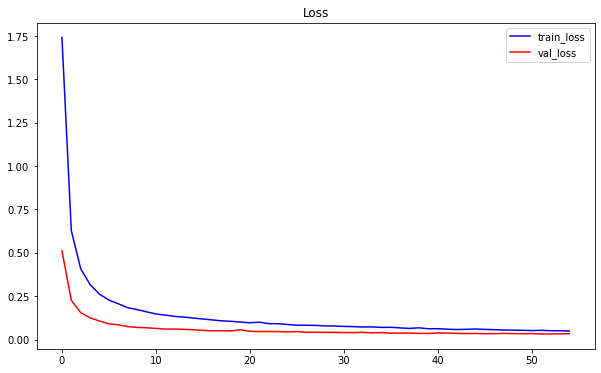

In [14]:
summary_history_losses(history)

### Prediction

In [15]:
Y_pred_val = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred__valclasses = np.argmax(Y_pred_val,axis = 1) 
# Convert validation observations to one hot vectors
Y_true_val = np.argmax(y_valid, axis = 1) 

Y_pred_test = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_test_classes = np.argmax(Y_pred_test,axis = 1) 
# Convert validation observations to one hot vectors
Y_true_test = np.argmax(y_test,axis = 1) 

Y_pred_train = model.predict(X_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes_train = np.argmax(Y_pred_train,axis = 1) 
# Convert validation observations to one hot vectors
Y_true_train = np.argmax(y_train,axis = 1) 

In [16]:
Y_pred_test_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Test Set Confusion Matrix

Text(51.0, 0.5, 'True classes')

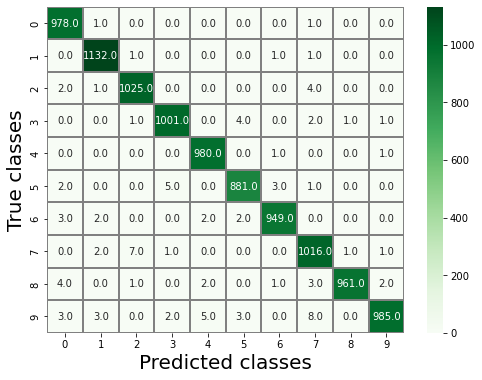

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

con_mat = confusion_matrix(Y_true_test, Y_pred_test_classes)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

### Validation Set Confusion Matrix

Text(51.0, 0.5, 'True classes')

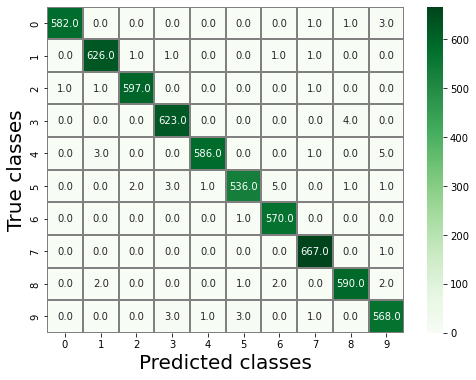

In [18]:
con_mat = confusion_matrix(Y_true_val, Y_pred__valclasses)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

### Train Set Confusion Matrix

Text(51.0, 0.5, 'True classes')

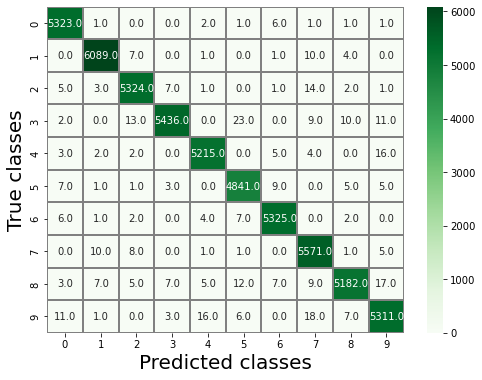

In [19]:
con_mat = confusion_matrix(Y_true_train, Y_pred_classes_train)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

### Test Set Classfication Report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_true_test, Y_pred_test_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Validation Set Classfication Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_true_val, Y_pred__valclasses))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      0.99      0.99       630
           2       0.99      0.99      0.99       600
           3       0.99      0.99      0.99       627
           4       1.00      0.98      0.99       595
           5       0.99      0.98      0.98       549
           6       0.99      1.00      0.99       571
           7       0.99      1.00      1.00       668
           8       0.99      0.99      0.99       597
           9       0.98      0.99      0.98       576

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



### Train Set Classfication Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_true_train, Y_pred_classes_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5336
           1       1.00      1.00      1.00      6112
           2       0.99      0.99      0.99      5358
           3       1.00      0.99      0.99      5504
           4       0.99      0.99      0.99      5247
           5       0.99      0.99      0.99      4872
           6       0.99      1.00      1.00      5347
           7       0.99      1.00      0.99      5597
           8       0.99      0.99      0.99      5254
           9       0.99      0.99      0.99      5373

    accuracy                           0.99     54000
   macro avg       0.99      0.99      0.99     54000
weighted avg       0.99      0.99      0.99     54000



In [23]:
from sklearn.metrics import accuracy_score
print('Train Set Accuracy Score: ', accuracy_score(Y_true_train, Y_pred_classes_train))

Train Set Accuracy Score:  0.9929074074074075


In [24]:
print('Validation Set Accuracy Score: ', accuracy_score(Y_true_val, Y_pred__valclasses))

Validation Set Accuracy Score:  0.9908333333333333


In [25]:
print('Test Set Accuracy Score: ', accuracy_score(Y_true_test, Y_pred_test_classes))

Test Set Accuracy Score:  0.9908


In [28]:
import pandas as pd
scores = { "Model-1" : {"Test" : 0.9871,
                        "Train": 0.9949259259259259}, 
           "Model-2" : {"Test" : 0.9897,
                        "Train": 0.9932407407407408},
           "Model-3" : {"Test" : 0.9908,
                        "Train": 0.9929074074074075}
                        }

Scores = pd.DataFrame(scores)
Scores

,Model-1,Model-2,Model-3
Test,0.987100,0.989700,0.990800
Train,0.994926,0.993241,0.992907
